#### GOAL

Generate insights by analysing the data to help our client decide what type of shows/movies to produce to develop the business in different countries.

#### PROBLEM STATEMENT 

Analyze the data and generate insights that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries

In [353]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('dataset/netflix.csv')

In [128]:
unprocessed_data = data.copy()

#### BASIC METRICS

In [4]:
unprocessed_data.ndim # The dataset is 2 dimensional

2

In [5]:
# Basic Metrics

In [6]:
unprocessed_data.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [7]:
unprocessed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


#### OBSERVATIONS

* The data has 8807 rows with 12 columns.
* There are null values in some columns (director, cast, country, date_added, rating, duration)
* We could see the `type` and `rating` to be given as object which needs to be converted to categories
* The only numerical field in the dataset is the `release_year`
* The `cast` and genre `listed_in` has multiple values which needs to unnested.
* The duration has the number of minutes the movie will be running and the other type for how many seasons were released.

In [8]:
unprocessed_data.shape

(8807, 12)

In [9]:
unprocessed_data.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [129]:
unprocessed_data['type'] = unprocessed_data['type'].astype('category')
unprocessed_data['rating'] = unprocessed_data['rating'].astype('category')

In [11]:
unprocessed_data.dtypes

show_id           object
type            category
title             object
director          object
cast              object
country           object
date_added        object
release_year       int64
rating          category
duration          object
listed_in         object
description       object
dtype: object

In [12]:
unprocessed_data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [13]:
unprocessed_data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [19]:
unprocessed_data.groupby("type",observed=True).mean(numeric_only=True)

,release_year
type,
Movie,2013.121514
TV Show,2016.605755


In [24]:
unprocessed_data.groupby("rating",observed=True).mean(numeric_only=True)

,release_year
rating,
66 min,2015.000000
74 min,2017.000000
84 min,2010.000000
G,1997.804878
NC-17,2015.000000
NR,2010.912500
PG,2008.428571
PG-13,2009.314286
R,2010.471840


In [16]:
# print(np.where(unprocessed_data['rating'] == '66 min' )[0][0])
# print(np.where(unprocessed_data['rating'] == '74 min' )[0][0])
# print(np.where(unprocessed_data['rating'] == '84 min' )[0][0])

#for i in unprocessed_data['rating']:
    #if i == '66 min' or  i == '74 min' or i == '84 min':

invalid_rating_list = []

for invalid_rating in ['66 min' ,'74 min','84 min']:
    invalid_rating_list.append(np.where(unprocessed_data['rating'] == invalid_rating)[0][0])
print(invalid_rating_list)

[5813, 5541, 5794]


In [17]:
unprocessed_data.iloc[invalid_rating_list]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...


#### OBSERVATIONS

* We could see the shape of data of 8807 rows and 12 columns as mentioned in the above observation.
* We have converted the `type` and `rating` columns to categories.
* We have movies/shows that were released between 1925 to 2021.
* On average, we could see the value to be 2014 meaning that 2014 - 2021 (`7 years`) has the same number of movies/shows as 1925 - 2014 (`89 years`)
* Based on `type` of movies/shows, on average it as 2013 and 2016 respectively.
* we could see the `duration` to be missing but present in `rating` column.
* `rating` column also has 2 values as NR(`Not Rated`) and UR(`UnRated`) which are the same. (If a film has not been submitted for a rating or is an uncut version of a film that was submitted, the labels Not Rated (NR) or Unrated (UR) are often used.)

#### NON GRAPHICAL ANALYSIS

In [32]:
# type

unprocessed_data['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [33]:
# director

unprocessed_data['director'].value_counts()

director
Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: count, Length: 4528, dtype: int64

In [57]:
unprocessed_data[unprocessed_data['director'].isin(unprocessed_data['director'].value_counts()[unprocessed_data['director'].value_counts()<10].index)].director

0                     Kirsten Johnson
2                     Julien Leclercq
5                       Mike Flanagan
6       Robert Cullen, José Luis Ucha
7                        Haile Gerima
                    ...              
8801                  Majid Al Ansari
8802                    David Fincher
8804                  Ruben Fleischer
8805                     Peter Hewitt
8806                      Mozez Singh
Name: director, Length: 6020, dtype: object

In [56]:
unprocessed_data[unprocessed_data['director'].isin(unprocessed_data['director'].value_counts()[unprocessed_data['director'].value_counts()>=10].index)].director

41         Steven Spielberg
329        Steven Spielberg
406           Rajiv Chilaka
407           Rajiv Chilaka
408           Rajiv Chilaka
               ...         
8625       Don Michael Paul
8626       Don Michael Paul
8696       Steven Spielberg
8735        Martin Scorsese
8789    Cathy Garcia-Molina
Name: director, Length: 153, dtype: object

In [58]:
unprocessed_data[unprocessed_data['director'].isin(unprocessed_data['director'].value_counts()[unprocessed_data['director'].value_counts()==1].index)].director

0                     Kirsten Johnson
6       Robert Cullen, José Luis Ucha
7                        Haile Gerima
8                     Andy Devonshire
9                      Theodore Melfi
                    ...              
8792                           Mu Chu
8798          Chandra Prakash Dwivedi
8801                  Majid Al Ansari
8805                     Peter Hewitt
8806                      Mozez Singh
Name: director, Length: 3661, dtype: object

In [64]:
print(unprocessed_data['director'].value_counts().values.mean())
print(np.median(unprocessed_data['director'].value_counts().values))

1.3632950530035335
1.0


In [59]:
unprocessed_data['director'].nunique()

4528

In [65]:
# cast

unprocessed_data['cast'].value_counts()

cast
David Attenborough                                                                                                                                                                            19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                                                                                       14
Samuel West                                                                                                                                                                                   10
Jeff Dunham                                                                                                                                                                                    7
David Spade, London Hughes, Fortune Feimster                                                                                                                                                   6
                              

In [66]:
# country

unprocessed_data['country'].value_counts()

country
United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 748, dtype: int64

In [82]:
# date_added

unprocessed_data[['date_added']].value_counts().head(25)

date_added       
January 1, 2020      109
November 1, 2019      89
March 1, 2018         75
December 31, 2019     74
October 1, 2018       71
July 1, 2021          60
October 1, 2019       60
November 1, 2018      60
September 1, 2021     56
January 1, 2018       52
July 1, 2019          52
June 2, 2021          51
January 1, 2021       49
October 1, 2017       47
April 1, 2018         44
April 1, 2020         43
May 1, 2018           41
July 1, 2018          40
August 1, 2017        39
July 6, 2021          39
July 1, 2017          38
September 1, 2017     38
August 1, 2021        38
February 1, 2019      38
January 1, 2019       37
Name: count, dtype: int64

In [90]:
# date_added

unprocessed_data[['date_added', 'type']].value_counts().head(25)

date_added         type   
January 1, 2020    Movie      97
November 1, 2019   Movie      75
March 1, 2018      Movie      72
December 31, 2019  Movie      67
October 1, 2018    Movie      64
November 1, 2018   Movie      55
July 1, 2021       Movie      53
October 1, 2019    Movie      51
September 1, 2021  Movie      48
January 1, 2018    Movie      47
July 1, 2019       Movie      43
June 2, 2021       Movie      42
January 1, 2021    Movie      41
July 1, 2018       Movie      38
April 1, 2018      Movie      38
October 1, 2017    Movie      34
April 1, 2020      Movie      34
January 1, 2019    Movie      33
August 1, 2021     Movie      33
August 1, 2018     Movie      33
May 1, 2018        Movie      32
July 6, 2021       TV Show    31
May 1, 2021        Movie      30
September 1, 2017  Movie      29
July 5, 2020       Movie      28
Name: count, dtype: int64

In [101]:
# date_added
# validating if the count matches

unprocessed_data[unprocessed_data['date_added'] == 'January 1, 2020'].groupby('type', observed=False).count()['date_added']

type
Movie      97
TV Show    12
Name: date_added, dtype: int64

In [68]:
# release_year

unprocessed_data['release_year'].value_counts() 

release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: count, Length: 74, dtype: int64

In [103]:
unprocessed_data['release_year'].unique()

array([2020, 2021, 1993, 2018, 1996, 1998, 1997, 2010, 2013, 2017, 1975,
       1978, 1983, 1987, 2012, 2001, 2014, 2002, 2003, 2004, 2011, 2008,
       2009, 2007, 2005, 2006, 1994, 2015, 2019, 2016, 1982, 1989, 1990,
       1991, 1999, 1986, 1992, 1984, 1980, 1961, 2000, 1995, 1985, 1976,
       1959, 1988, 1981, 1972, 1964, 1945, 1954, 1979, 1958, 1956, 1963,
       1970, 1973, 1925, 1974, 1960, 1966, 1971, 1962, 1969, 1977, 1967,
       1968, 1965, 1946, 1942, 1955, 1944, 1947, 1943], dtype=int64)

In [104]:
len(unprocessed_data['release_year'].unique())

74

In [69]:
# duration

unprocessed_data['duration'].value_counts()

duration
1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
16 min          1
186 min         1
193 min         1
189 min         1
191 min         1
Name: count, Length: 220, dtype: int64

In [81]:
unprocessed_data['duration'].value_counts().head(30)

duration
1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
97 min        146
93 min        146
91 min        144
95 min        137
96 min        130
92 min        129
102 min       122
98 min        120
99 min        118
101 min       116
88 min        116
103 min       114
106 min       111
100 min       108
89 min        106
104 min       104
86 min        103
105 min       101
87 min        101
107 min        98
110 min        97
4 Seasons      95
108 min        87
116 min        80
112 min        74
Name: count, dtype: int64

In [31]:
unprocessed_data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

#### OBSERVATIONS

* We have 6131 movies and 2676 tv shows in netflix platform.
* out of 4528 directors, 3661 directors directed 1 movie/shows and 153 directors took more than 9 movies/shows.(We further needs to split the directors as more than 1 director has directed some shows/movies)
* Using `cast`, we need to list the individual actors list to get the count as multiple cast individuals play roles in the movies/shows.
* The shows/movies are added to the netflix platform mostly on the 1st of each month, on some occasions it will be some other dates, we need to further segregate them into days, months and years to get the exact dates and month with the `type` to recommend.
* Most movies have `duration` of more than 80 minutes and can further be split into seasons and minutes to get the average time to see how many hours/minutes are our customers will need to spend time on.
* We have movies released in 74 different years.

#### UNNESTING VALUES

In [130]:
unprocessed_data.head(15)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [196]:
unprocessed_data['listed_in'] = unprocessed_data['listed_in'].str.split(', ')

In [198]:
unprocessed_data['director'] = unprocessed_data['director'].str.split(', ')
unprocessed_data['cast'] = unprocessed_data['cast'].str.split(', ')
unprocessed_data['country'] = unprocessed_data['country'].str.split(', ')

In [206]:
preprocessed_data = unprocessed_data.copy()

In [207]:
preprocessed_data = preprocessed_data.explode('listed_in')
preprocessed_data = preprocessed_data.explode('cast')
preprocessed_data = preprocessed_data.explode('director')
preprocessed_data = preprocessed_data.explode('country')

In [208]:
preprocessed_data.shape

(201991, 12)

In [209]:
preprocessed_data.describe()

,release_year
count,201991.000000
mean,2013.452891
std,9.003933
min,1925.000000
25%,2012.000000
50%,2016.000000
75%,2019.000000
max,2021.000000


In [210]:
preprocessed_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201991 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   show_id       201991 non-null  object  
 1   type          201991 non-null  category
 2   title         201991 non-null  object  
 3   director      151348 non-null  object  
 4   cast          199845 non-null  object  
 5   country       190094 non-null  object  
 6   date_added    201833 non-null  object  
 7   release_year  201991 non-null  int64   
 8   rating        201924 non-null  category
 9   duration      201988 non-null  object  
 10  listed_in     201991 non-null  object  
 11  description   201991 non-null  object  
dtypes: category(2), int64(1), object(9)
memory usage: 17.3+ MB


In [211]:
preprocessed_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Thabang Molaba,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."


#### OBSERVATIONS

* After unnesting the values, we have 201991 rows.

In [235]:
preprocessed_data['date_converted'] = pd.to_datetime(preprocessed_data['date_added'].str.strip(), format='%B %d, %Y')
# modifying date time converted for date_added
preprocessed_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_converted
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021-09-24
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021-09-24
1,s2,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021-09-24
1,s2,TV Show,Blood & Water,NaN,Thabang Molaba,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021-09-24


In [319]:
preprocessed_data['extracted_year'] = preprocessed_data['date_converted'].dt.year # Extract Year
preprocessed_data['extracted_month'] = preprocessed_data['date_converted'].dt.month # Extract Month
preprocessed_data['extracted_day'] = preprocessed_data['date_converted'].dt.day # Extract Day

#### MISSING VALUES

In [342]:
preprocessed_data['extracted_year'] = preprocessed_data['extracted_year'].fillna(0)
preprocessed_data['extracted_month'] = preprocessed_data['extracted_month'].fillna(0)
preprocessed_data['extracted_day'] = preprocessed_data['extracted_day'].fillna(0)

In [343]:
preprocessed_data['extracted_year'] = preprocessed_data['extracted_year'].astype(int)
preprocessed_data['extracted_month'] = preprocessed_data['extracted_month'].astype(int)
preprocessed_data['extracted_day'] = preprocessed_data['extracted_day'].astype(int)

In [345]:
# using this cell converts the day, month and year to float(for charts, we are not using this cell)

# preprocessed_data['extracted_year'] = preprocessed_data['extracted_year'].replace(0, np.nan)
# preprocessed_data['extracted_month'] = preprocessed_data['extracted_month'].replace(0, np.nan)
# preprocessed_data['extracted_day'] = preprocessed_data['extracted_day'].replace(0, np.nan)

In [350]:
preprocessed_data[preprocessed_data['extracted_year'] == 0].head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_converted,extracted_year,extracted_month,extracted_day
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,NaN,Daniel Radcliffe,United Kingdom,NaN,2013,TV-MA,2 Seasons,British TV Shows,"Set during the Russian Revolution, this comic ...",NaT,0,0,0
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,NaN,Jon Hamm,United Kingdom,NaN,2013,TV-MA,2 Seasons,British TV Shows,"Set during the Russian Revolution, this comic ...",NaT,0,0,0


#### VISUAL ANALYSIS

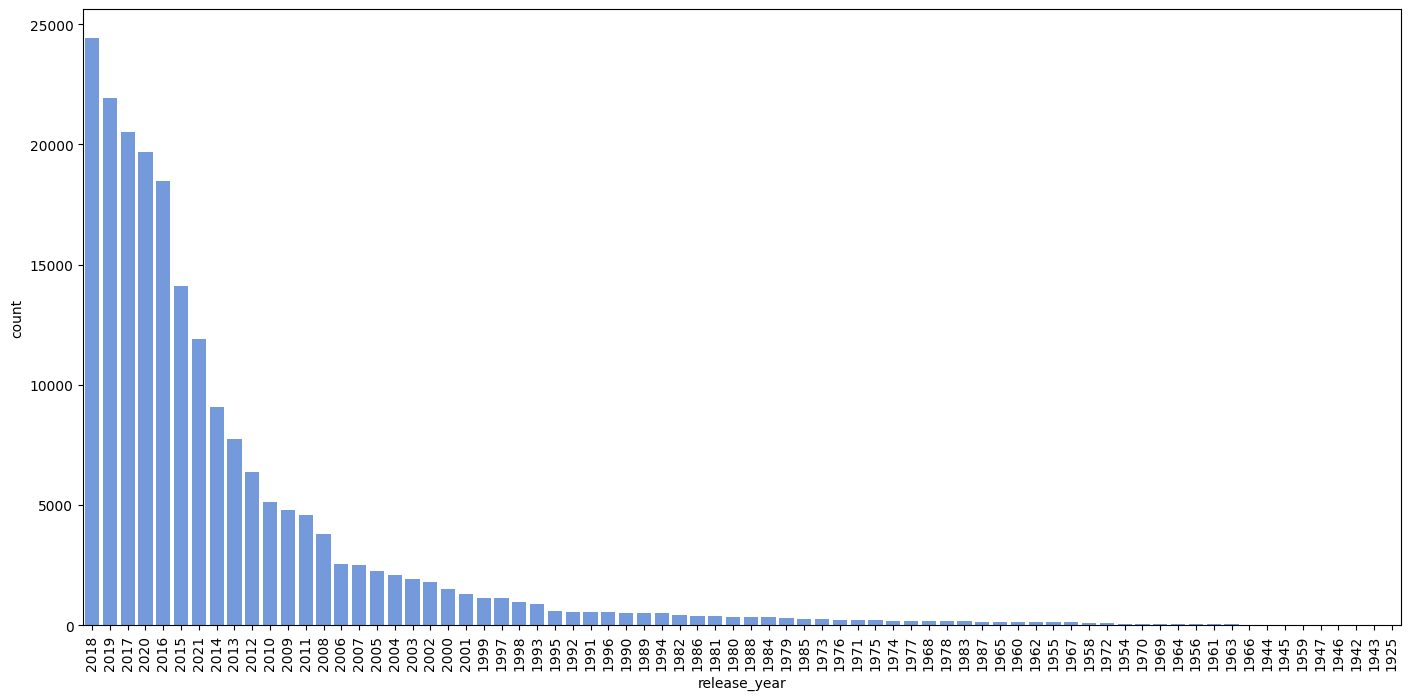

In [363]:
# Univariate - continuous - release_year - countplot

plt.figure(figsize=(17,8))

sns.countplot(x='release_year', data=preprocessed_data, order=preprocessed_data['release_year'].value_counts().index, color='cornflowerblue')
plt.xticks(rotation=90)
plt.show()

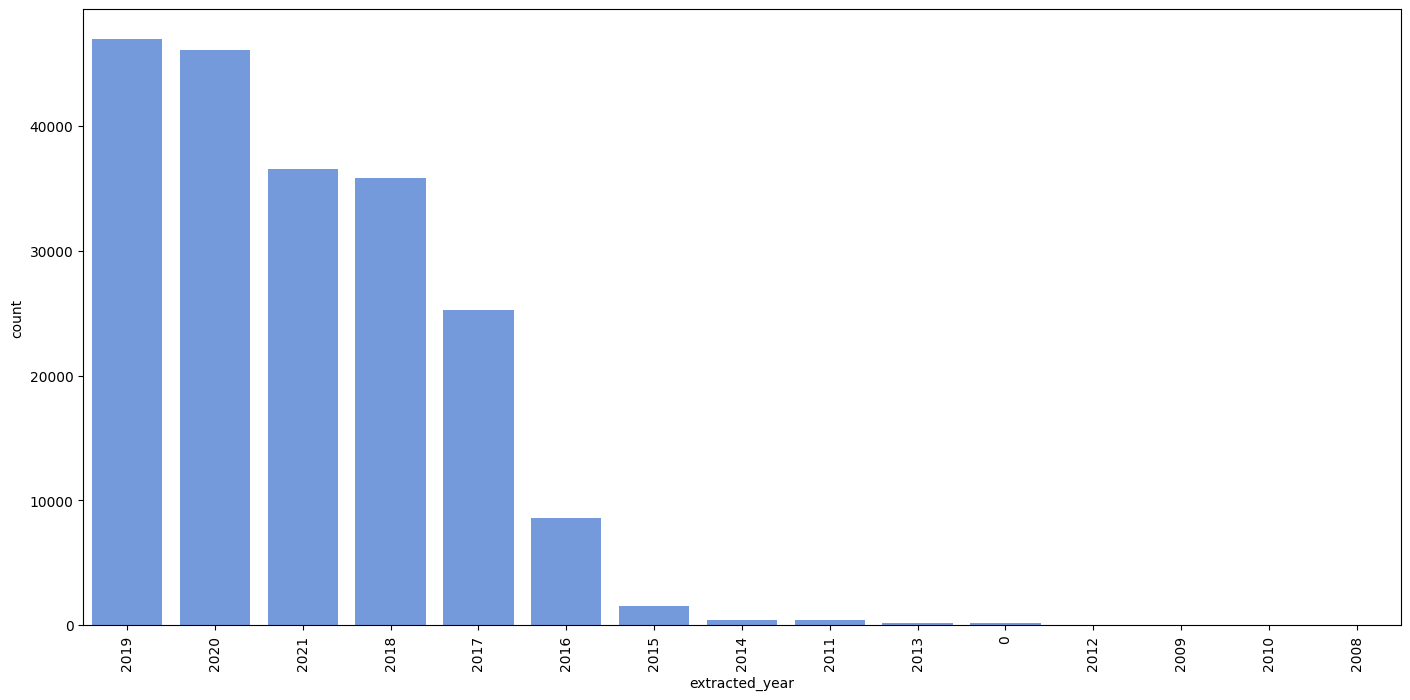

In [373]:
# Univariate - continuous - extracted_year - countplot

plt.figure(figsize=(17,8))

sns.countplot(x='extracted_year', data=preprocessed_data, order=preprocessed_data['extracted_year'].value_counts().index, color='cornflowerblue')
plt.xticks(rotation=90)
plt.show()

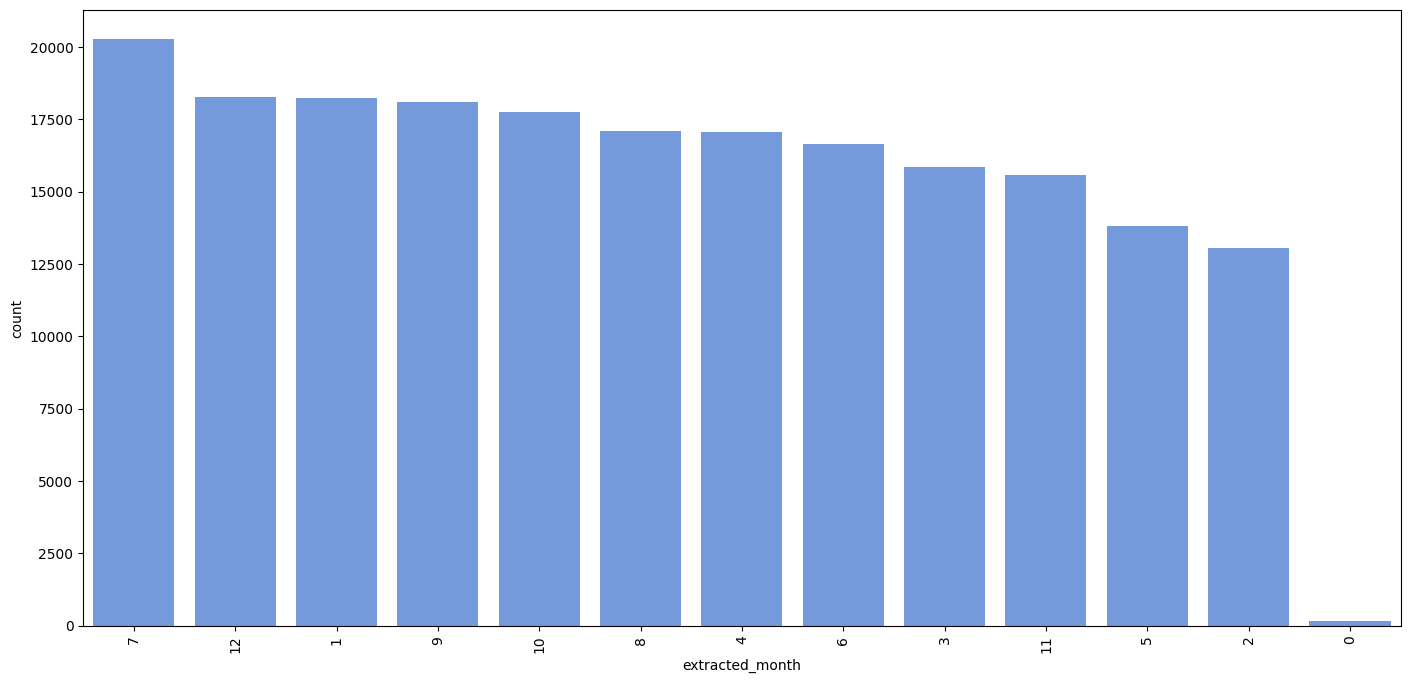

In [374]:
# Univariate - continuous - extracted_month - countplot

plt.figure(figsize=(17,8))

sns.countplot(x='extracted_month', data=preprocessed_data, order=preprocessed_data['extracted_month'].value_counts().index, color='cornflowerblue')
plt.xticks(rotation=90)
plt.show()

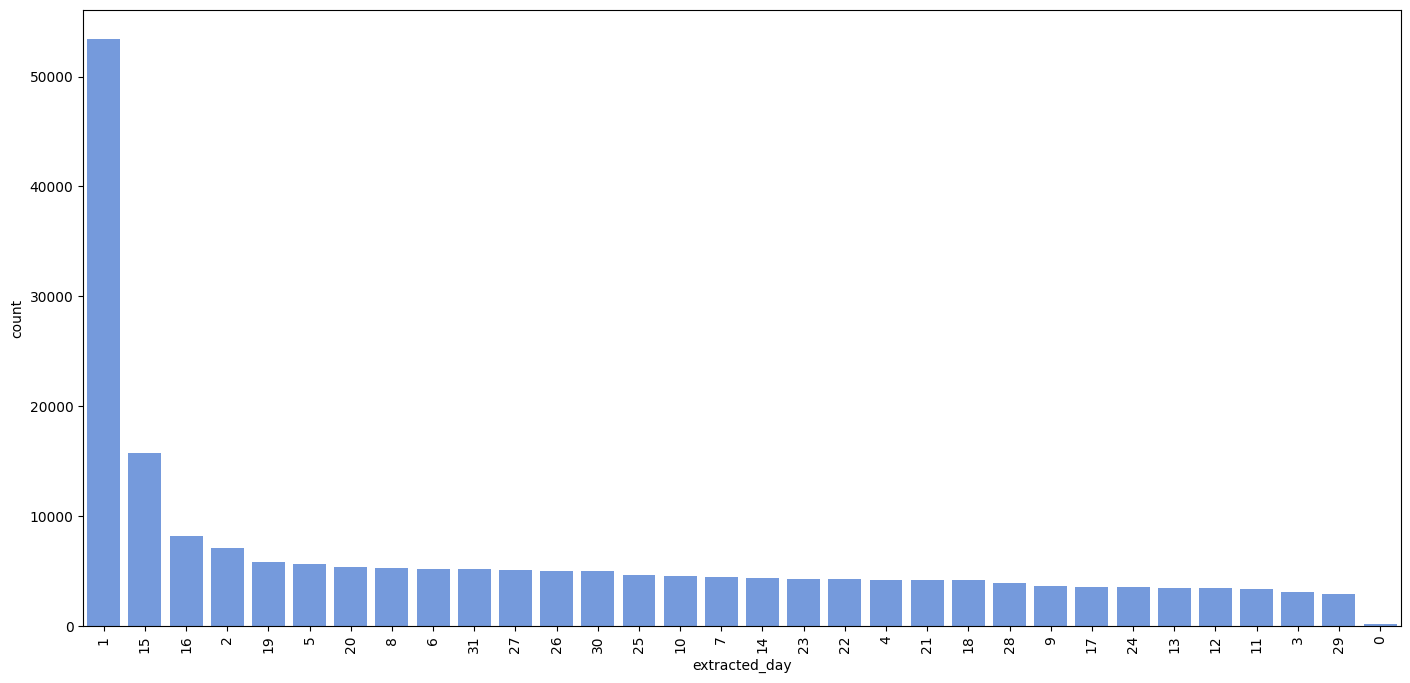

In [375]:
# Univariate - continuous - extracted_day - countplot

plt.figure(figsize=(17,8))

sns.countplot(x='extracted_day', data=preprocessed_data, order=preprocessed_data['extracted_day'].value_counts().index, color='cornflowerblue')
plt.xticks(rotation=90)
plt.show()

In [364]:
preprocessed_data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'date_converted', 'extracted_year', 'extracted_month', 'extracted_day'],
      dtype='object')

#### OBSERVATIONS

* Based on the Univariate analysis,  we could see most movies/tv shows were released in `2018, 2019, 2017, 2020, 2016` and then later added to the netflix platform.
* Based on the charts we could see netflix has added the most number of shows/movies after `2015`.
* Most movies/shows were added during the month of `July,December,january,September`.
* Most movies/shows were added during the date of `1` and `15` of each month.
* There are `158` values missing.

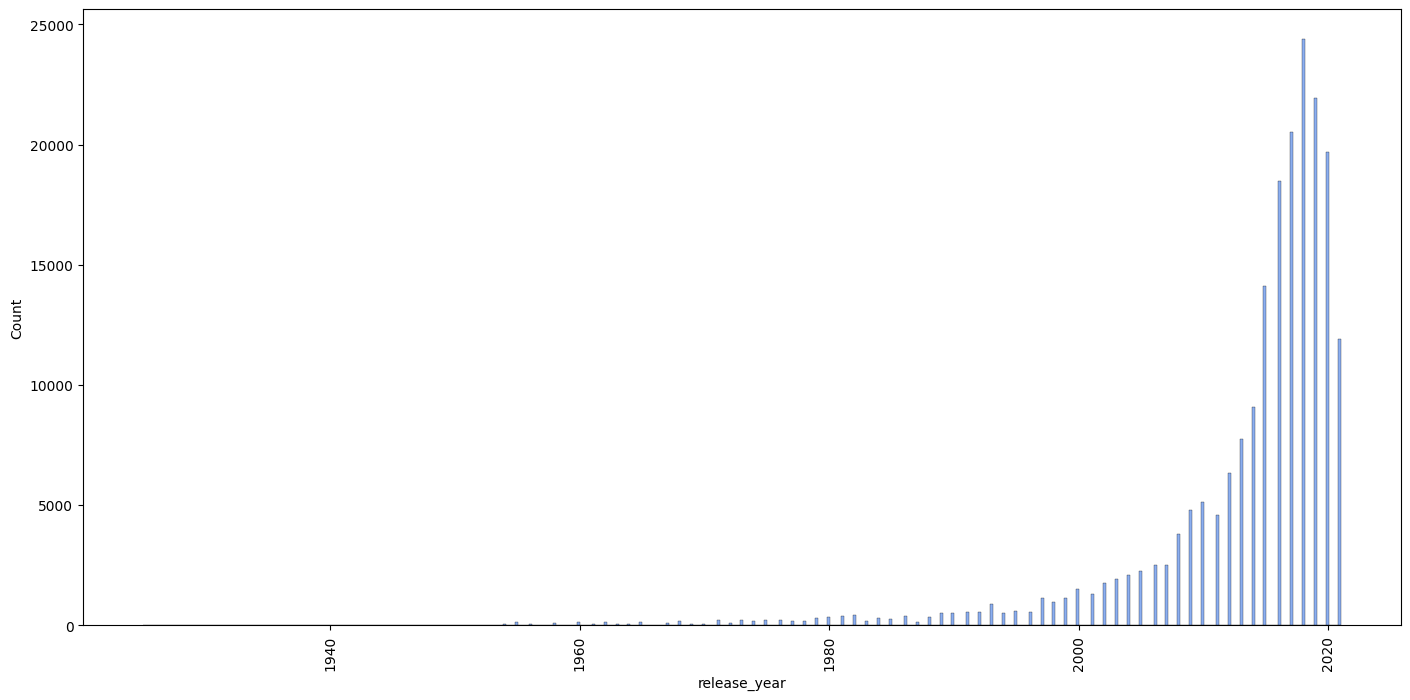

In [377]:
# Univariate - continuous - release_year - histplot

plt.figure(figsize=(17,8))

sns.histplot(x='release_year', data=preprocessed_data, color='cornflowerblue')
plt.xticks(rotation=90)
plt.show()

#### OBSERVATIONS

* Based on the above chart, we can see the movies/shows were released `steadily increased till 2018` and then it started to `decrease from 2019`.